In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 7})
%config InlineBackend.figure_format = 'png2x'

In [3]:
genres = np.load('./datasets/genre_names.npy')

predictions = np.load('./datasets/predictions/predictions_tuned.npy')
predictions = pd.DataFrame(predictions)
predictions.columns = genres

In [4]:
counts = {}
for column in predictions.columns:
    counts[column] = {}
    
    for sec_column in predictions.columns:
        counts[column][sec_column] = 0.0

    for idx in predictions.index:
        if predictions.loc[idx, column] == 1:
            for genre in predictions.columns:
                if predictions.loc[idx, genre] == 1:
                    counts[column][genre] += 1.0
    
    for genre in predictions.columns:
        try:
            counts[column][genre] = counts[column][genre] / predictions[predictions[column] == 1].shape[0]
        except:
            pass
        
df_counts = pd.DataFrame(counts)

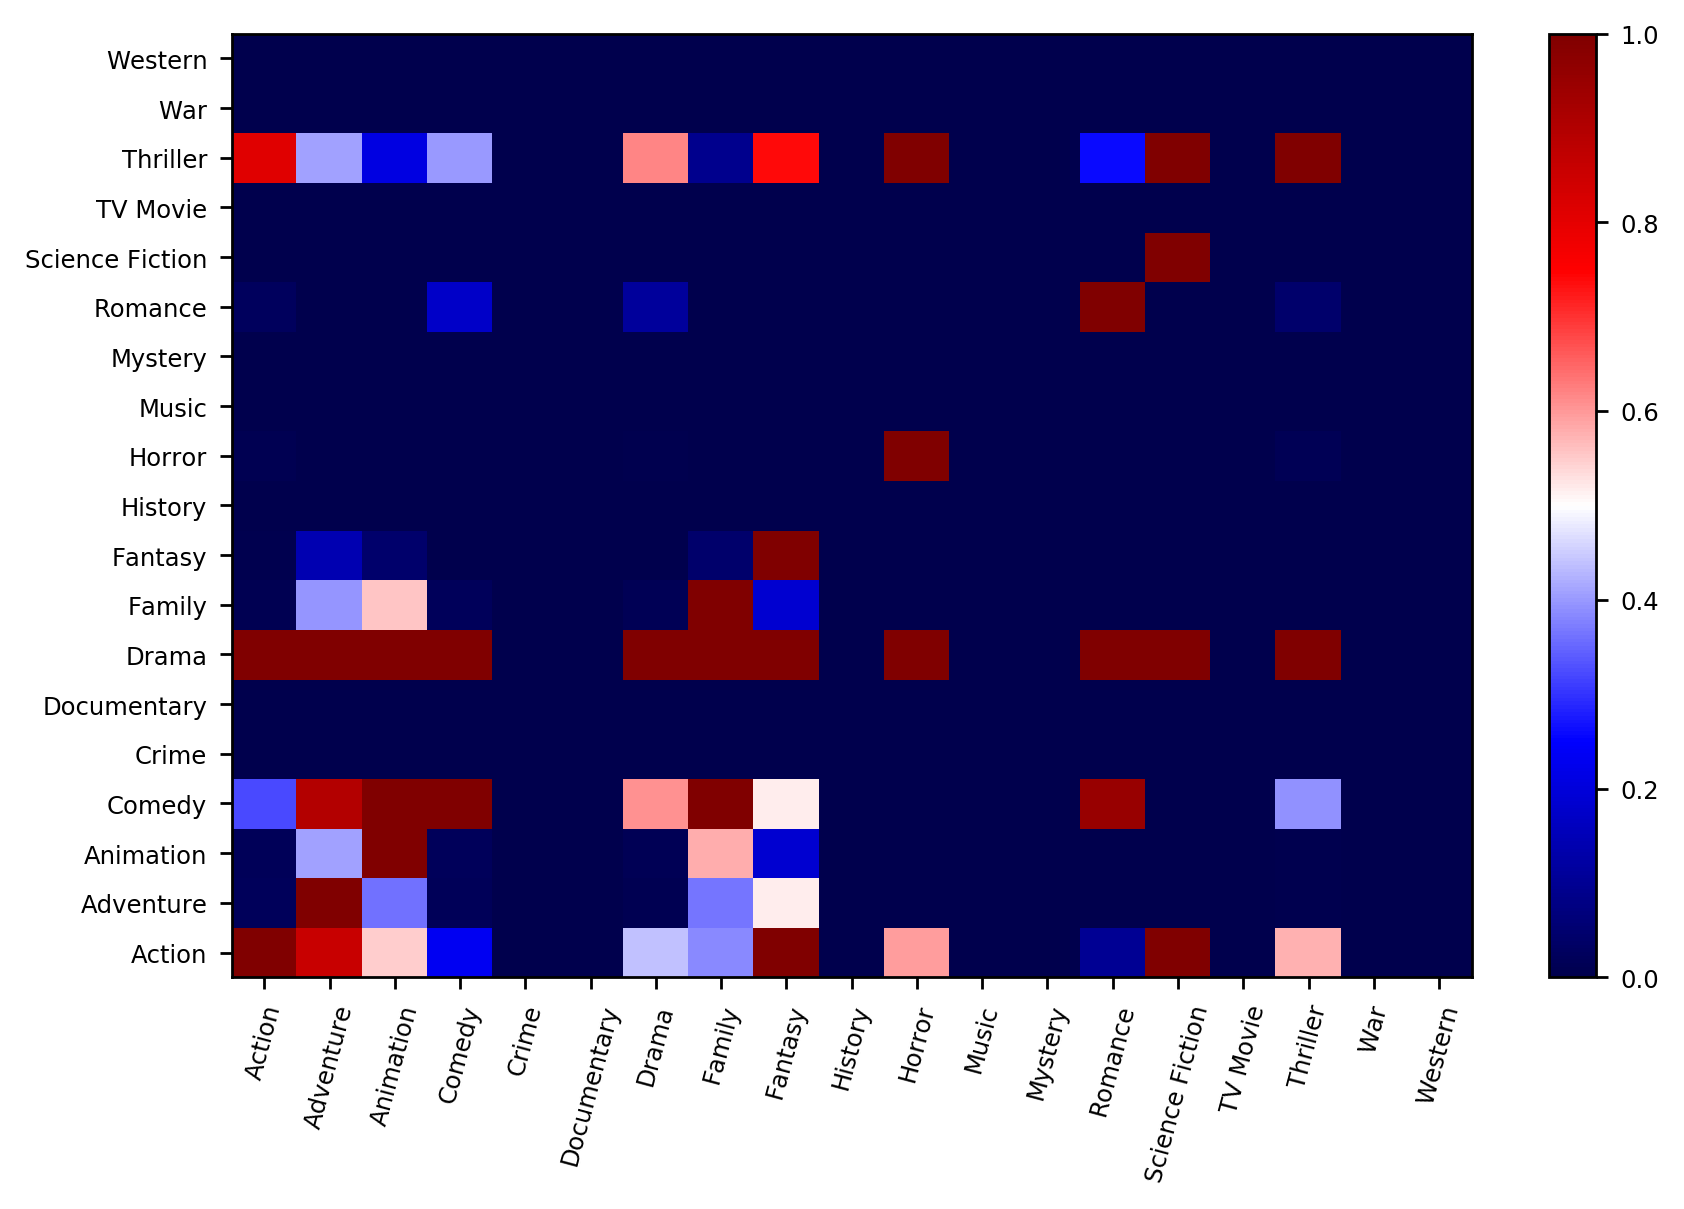

In [5]:
plt.subplots(figsize=(8, 5), dpi=125)
plt.pcolor(df_counts, cmap='seismic')
plt.yticks(np.arange(0.5, len(df_counts.index), 1), df_counts.index)
plt.xticks(np.arange(0.5, len(df_counts.columns), 1), df_counts.columns, rotation=75)
plt.colorbar()
plt.show()